# 作業目標:
使用CIFAR100, 數據集變大的影響  
# 作業重點:
了解 CIFAR100 跟 CIFAR10 數據及差異

In [21]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

# 資料準備

In [23]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

In [24]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [34]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        '''        
        title=str(i)+','+label_dict[labels[i][0]]  #有100張圖，若要先針對物件圖像數據集的類別編列成字典太累了...所以跳過範例的這步
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
        '''
        #ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

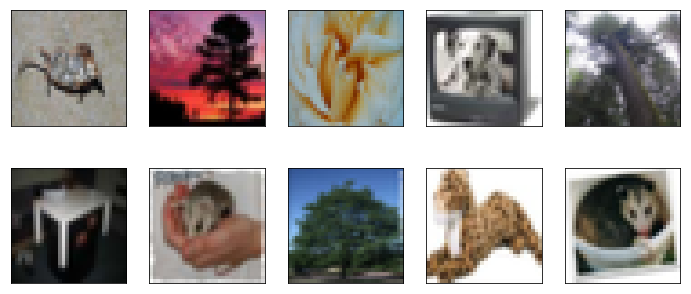

In [39]:
plot_images_labels_prediction(x_img_train,y_label_train,[],20) #ex.從第20張開始看

In [40]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize

In [41]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [42]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [43]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [44]:
y_label_train.shape

(50000, 1)

In [45]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [46]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [47]:
y_label_train_OneHot.shape

(50000, 100)

In [48]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.

# 課程目標:
了解Keras 內建dataset 如何使用  
# 範例重點
使用CIFAR10 練習如何分類, 架構網路層  
如何對數據集進行查詢

# 導入必要的程式庫

In [1]:
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar10.load_data()

In [3]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [4]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [6]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [7]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [8]:
#針對物件圖像數據集的類別編列成字典
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [9]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

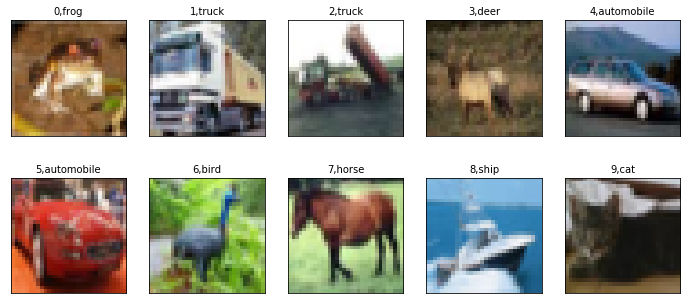

In [10]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [11]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# 影像正規化

In [12]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [13]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [14]:
x_img_train_normalize[0][0][0]

array([0.23137255, 0.24313726, 0.24705882], dtype=float32)

# 轉換label 為OneHot Encoding

In [15]:
y_label_train.shape

(50000, 1)

In [16]:
y_label_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [17]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [18]:
y_label_train_OneHot.shape

(50000, 10)

In [19]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# 參考資料
[Keras： The Python Deep Learning library](https://github.com/keras-team/keras/)  
[Keras dataset](https://keras.io/datasets/)  
[Predicting Boston House Prices](https://www.kaggle.com/sagarnildass/predicting-boston-house-prices) 

推薦數據集：

[**Imagenet**](http://www.image-net.org/about-stats)

Imagenet數據集有1400多萬幅圖片，涵蓋2萬多個類別；其中有超過百萬的圖片有明確的類別標註和圖像中物體位置的標註，具體信息如下：

1）Total number of non-empty synsets : 21841 

2）Total number of images: 14,197,122 

3）Number of images with bounding box annotations: 1,034,908 

4）Number of synsets with SIFT features: 1000 

5）Number of images with SIFT features: 1.2 million



Imagenet數據集是目前深度學習圖像領域應用得非常多的一個領域，關於圖像分類、定位、檢測等研究工作大多基於此數據集展開。Imagenet數據集文檔詳細，有專門的團隊維護，使用非常方便，在計算機視覺領域研究論文中應用非常廣，幾乎成為了目前深度學習圖像領域算法性能檢驗的“標準”數據集。數據集大小：~1TB（ILSVRC2016比賽全部數據）

[**COCO**](http://mscoco.org/)  

COCO(Common Objects in Context)是一個新的圖像識別、分割和圖像語義數據集，它有如下特點：

1）Object segmentation 

2）Recognition in Context 

3）Multiple objects per image 

4）More than 300,000 images 

5）More than 2 Million instances 

6）80 object categories 

7）5 captions per image 

8）Keypoints on 100,000 people



COCO數據集由微軟贊助，其對於圖像的標註信息不僅有類別、位置信息，還有對圖像的語義文本描述，COCO數據集的開源使得近兩三年來圖像分割語義理解取得了巨大的進展，也幾乎成為了圖像語義理解算法性能評價的“標準”數據集。

Google開源的開源了圖說生成模型show and tell就是在此數據集上測試的，想玩的可以下下來試試。數據集大小：~40GB 